Klasyfikuj przypadki ze zbioru `wdbc.data` jako `M` - *malignant* lub `B` - *benign*.
* Podziel dane na zbiór treningowy i testowy. Ze zbioru treningowego wydziel dodatkowo zbiór walidacyjny
* Użyj k-NN do klasyfikacji przykładów ze zbioru walidacyjnego na podstawie pozostałych danych treningowych i wypisz dokładność, precyzję, pełność, F-miarę (zob. [metrics](https://scikit-learn.org/stable/modules/classes.html#classification-metrics), [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)). Warto wypisać też macierz omyłek ([`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)).
* Sprawdź, jaki wpływ na dokładność ma skalowanie danych. Pamiętaj, że skalować należy także dane walidacyjne/testowe.
* Stwórz wykres zależności dokładności (oś y) od k (oś x). Skorzystaj ze zbioru walidacyjnego.
* Wybierz najlepszy model i podaj jego dokładność dla danych testowych.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
data = pd.read_csv('../data/wdbc.data')

print(data.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [27]:
X = data.drop(columns="diagnosis")
y= data["diagnosis"]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=17)

In [28]:
# Testing without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.99      0.96        68
           M       0.98      0.89      0.93        46

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [29]:
# Pretty print confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print()
    print("True Positives:", cm[1, 1])
    print("True Negatives:", cm[0, 0])
    print("False Positives:", cm[0, 1])
    print("False Negatives:", cm[1, 0])

print_confusion_matrix(y_valid, y_pred)

Confusion Matrix:
[[67  1]
 [ 5 41]]

True Positives: 41
True Negatives: 67
False Positives: 1
False Negatives: 5


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_valid)

print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           B       0.99      1.00      0.99        68
           M       1.00      0.98      0.99        46

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [32]:
print_confusion_matrix(y_valid, y_pred)

Confusion Matrix:
[[68  0]
 [ 1 45]]

True Positives: 45
True Negatives: 68
False Positives: 0
False Negatives: 1


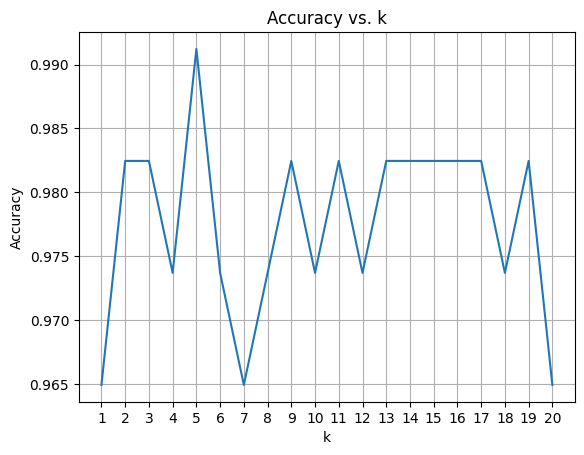

In [33]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    accuracies.append(knn.score(X_valid, y_valid))
plt.plot(k_values, accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k')
plt.xticks(k_values)
plt.grid()
plt.show()